# Checkpoint 1 - Clustering and Outlier Detection
You need to:
- represent the dataset in a vector space,
- perform exploratory data analysis (averages, distributions, ...) of the dataset after data cleaning and report the data cleaning step and the results of the analysis
- apply at least one clustering or outlier detection method,
- report at least one limitation that cannot be resolved with the current tools.
- compare the results using a simpler baseline or another method. (Compare with DBSCAN)

Only methods covered in Module 1 may be used.

## Dataset

## Exploratory Data Analysis

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Input data
df = pd.read_csv("C:\\Users\\Adrian\\Documents\\Aarhus University\\Data Mining\\Gowalla Data\\Gowalla_totalCheckins.txt", sep = "\t", header = None)
# read csv is still using local file path.
headers = ["user_id", "checkin_time", "latitude", "longitude", "location_id"]
df.columns = headers
print(df.head())

   user_id          checkin_time   latitude  longitude  location_id
0        0  2010-10-19T23:55:27Z  30.235909 -97.795140        22847
1        0  2010-10-18T22:17:43Z  30.269103 -97.749395       420315
2        0  2010-10-17T23:42:03Z  30.255731 -97.763386       316637
3        0  2010-10-17T19:26:05Z  30.263418 -97.757597        16516
4        0  2010-10-16T18:50:42Z  30.274292 -97.740523      5535878


### Data Cleaning Process

Text(0, 0.5, 'Latitude')

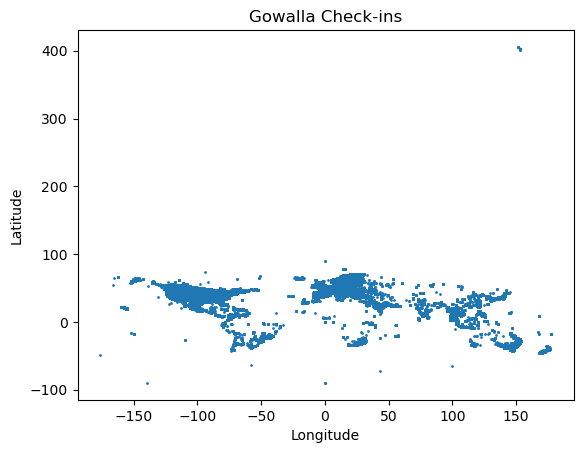

In [ ]:
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

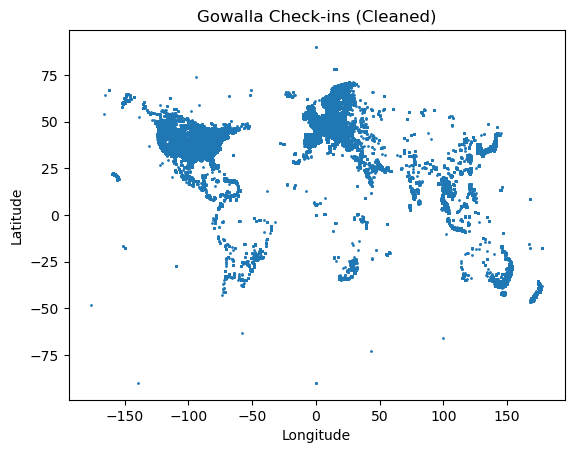

In [ ]:
#Removing outliers
df = df.drop(df[df['latitude'] >= 300].index)
plt.scatter(df["longitude"], df["latitude"], s=1)
plt.title("Gowalla Check-ins (Cleaned)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Clustering / Outlier Detection Method

## Comparison

## Limitations